### One-Dimensional Aggregation: Respondent Metadata

NB: The unit of analysis being aggregated here is the individual vote cast by participants.

NB: In the following, only the non-free text variables will be investigated (the rest will be added once we have the final data).

### Variable Reminder:

* v_5: primary working area
* v_6: free text in case of other in v5
* v_11: free text years of primary working area experience
* v_118-v_121: intensity of involvement in RE (v118 most intense)
* v_12: CS degree
* v_14: team size
* v_15: class of systems in project scope
* v_16: free text in case of other in v15
* v_19: free text industry sector
* v_124: country

In [1]:
exportdate = 20180315

The usual preparations...

In [14]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np

In [3]:
%matplotlib notebook

In [15]:
sns.set_style('darkgrid')

In [43]:
set(df['v_14'].values)

{'Larger (10-49)', 'Medium (5-10)', 'Small (1-4)', 'Very large (50+)'}

In [44]:
ratings = ['Essential', 'Worthwhile', 'Unimportant', 'Unwise']
teamsizes = ['Small (1-4)', 'Medium (5-10)', 'Larger (10-49)', 'Very large (50+)']

In [45]:
df = pd.read_csv(f'../analysis/{exportdate}repract_votelist_with_respondentmeta.csv')
df['Vote'] = pd.Categorical(df['Vote'].values, categories=ratings)
df['v_14'] = pd.Categorical(df['v_14'].values, categories=teamsizes)
df.head(1)

,EvID,PaperID,Vote,v_5,v_6,v_11,v_12,v_14,v_15,v_16,v_19,v_124,v_118,v_119,v_120,v_121
0,2,10,Worthwhile,Other (please specify),Product Management Coach,10,No,Medium (5-10),Other (please specify),Customer facing software products,Wide range (from automotive supplier to insura...,Germany,quoted,quoted,quoted,not quoted


### By Country (v_124)

In [26]:
bycountry = df.groupby(['v_124', 'Vote']
            ).count().reset_index().rename({'index':'v_124'}
            ).pivot('v_124', 'Vote', 'EvID').sort_index(ascending=False).fillna(0)#[ratings]
#bycountry['TotalVotes'] = bycountry.sum(axis=1)
bycountry.head(2)

Vote,Essential,Worthwhile,Unimportant,Unwise
v_124,,,,
Uruguay,2.0,5.0,5.0,3.0
United States,49.0,102.0,48.0,1.0


Counts

<IPython.core.display.Javascript object>


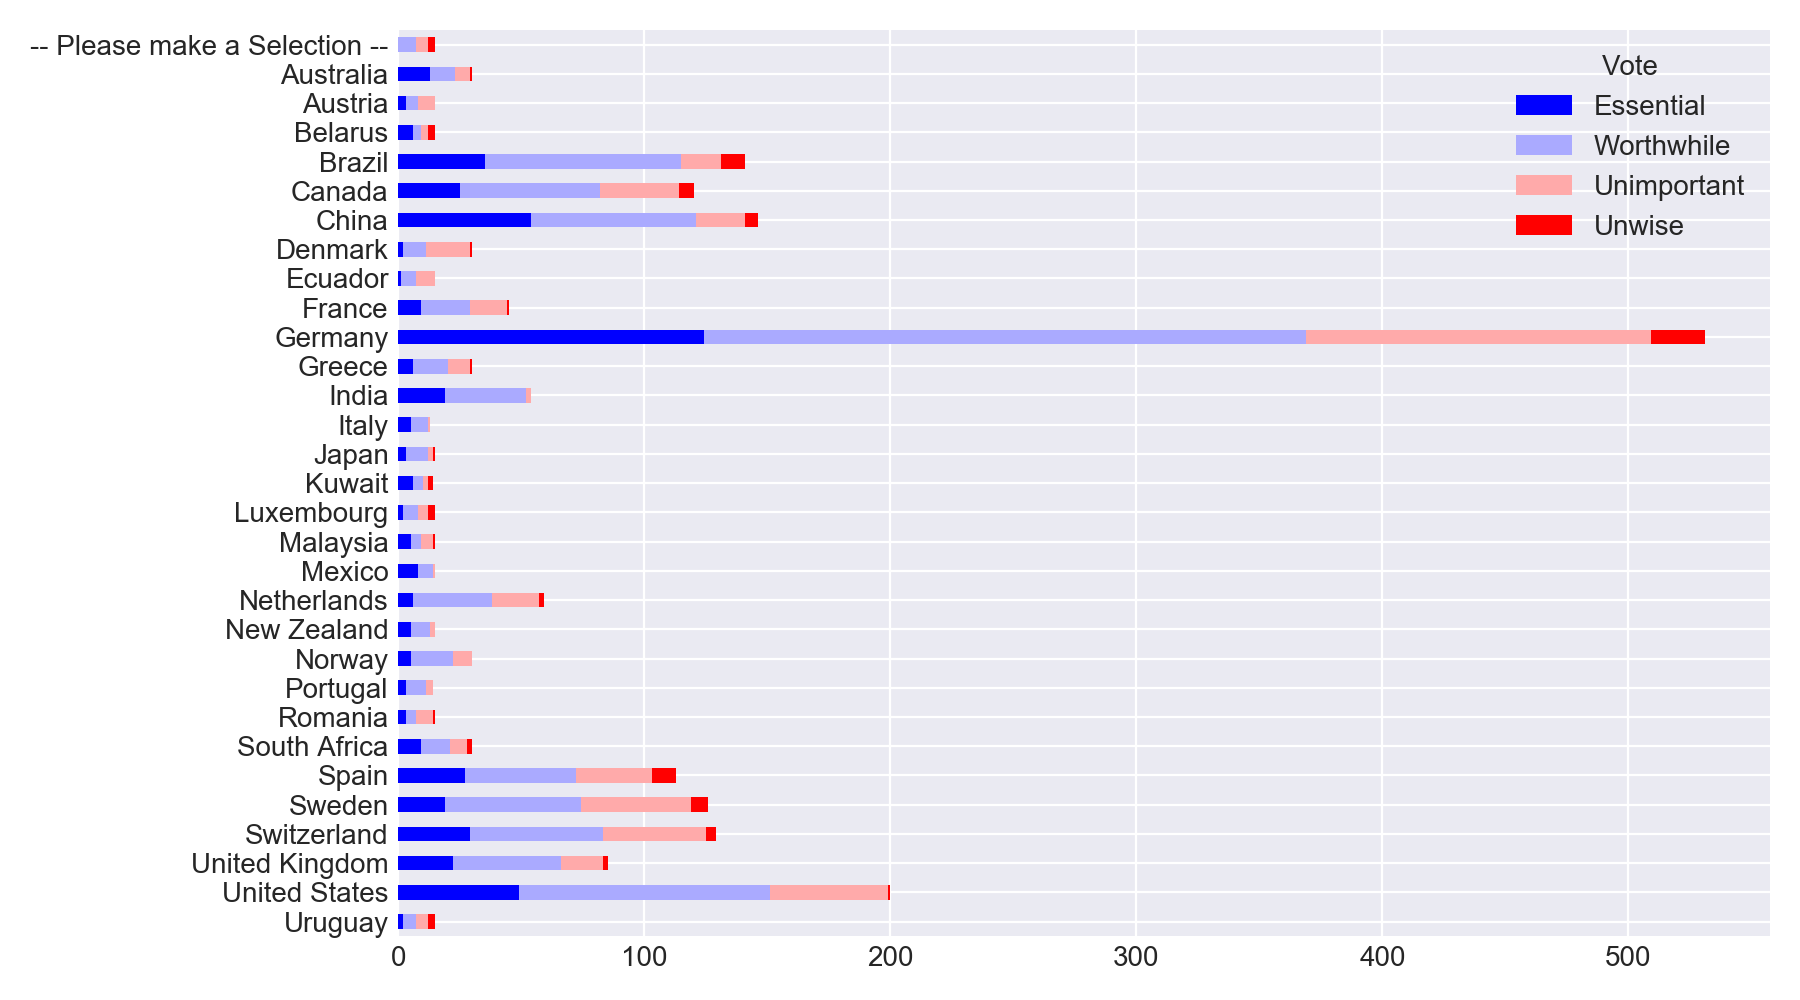

In [35]:
bycountry.plot.barh(stacked=True, cmap='bwr', figsize=(9,5))
plt.ylabel('')
plt.tight_layout()

Percentages

In [241]:
(bycountry.T / bycountry.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_124,,,,
Uruguay,0.133333,0.333333,0.333333,0.200000
United States,0.245000,0.510000,0.240000,0.005000
United Kingdom,0.258824,0.517647,0.200000,0.023529
Switzerland,0.224806,0.418605,0.325581,0.031008
Sweden,0.150794,0.436508,0.357143,0.055556
Spain,0.238938,0.398230,0.274336,0.088496
South Africa,0.300000,0.400000,0.233333,0.066667
Romania,0.200000,0.266667,0.466667,0.066667
Portugal,0.214286,0.571429,0.214286,0.000000


<IPython.core.display.Javascript object>


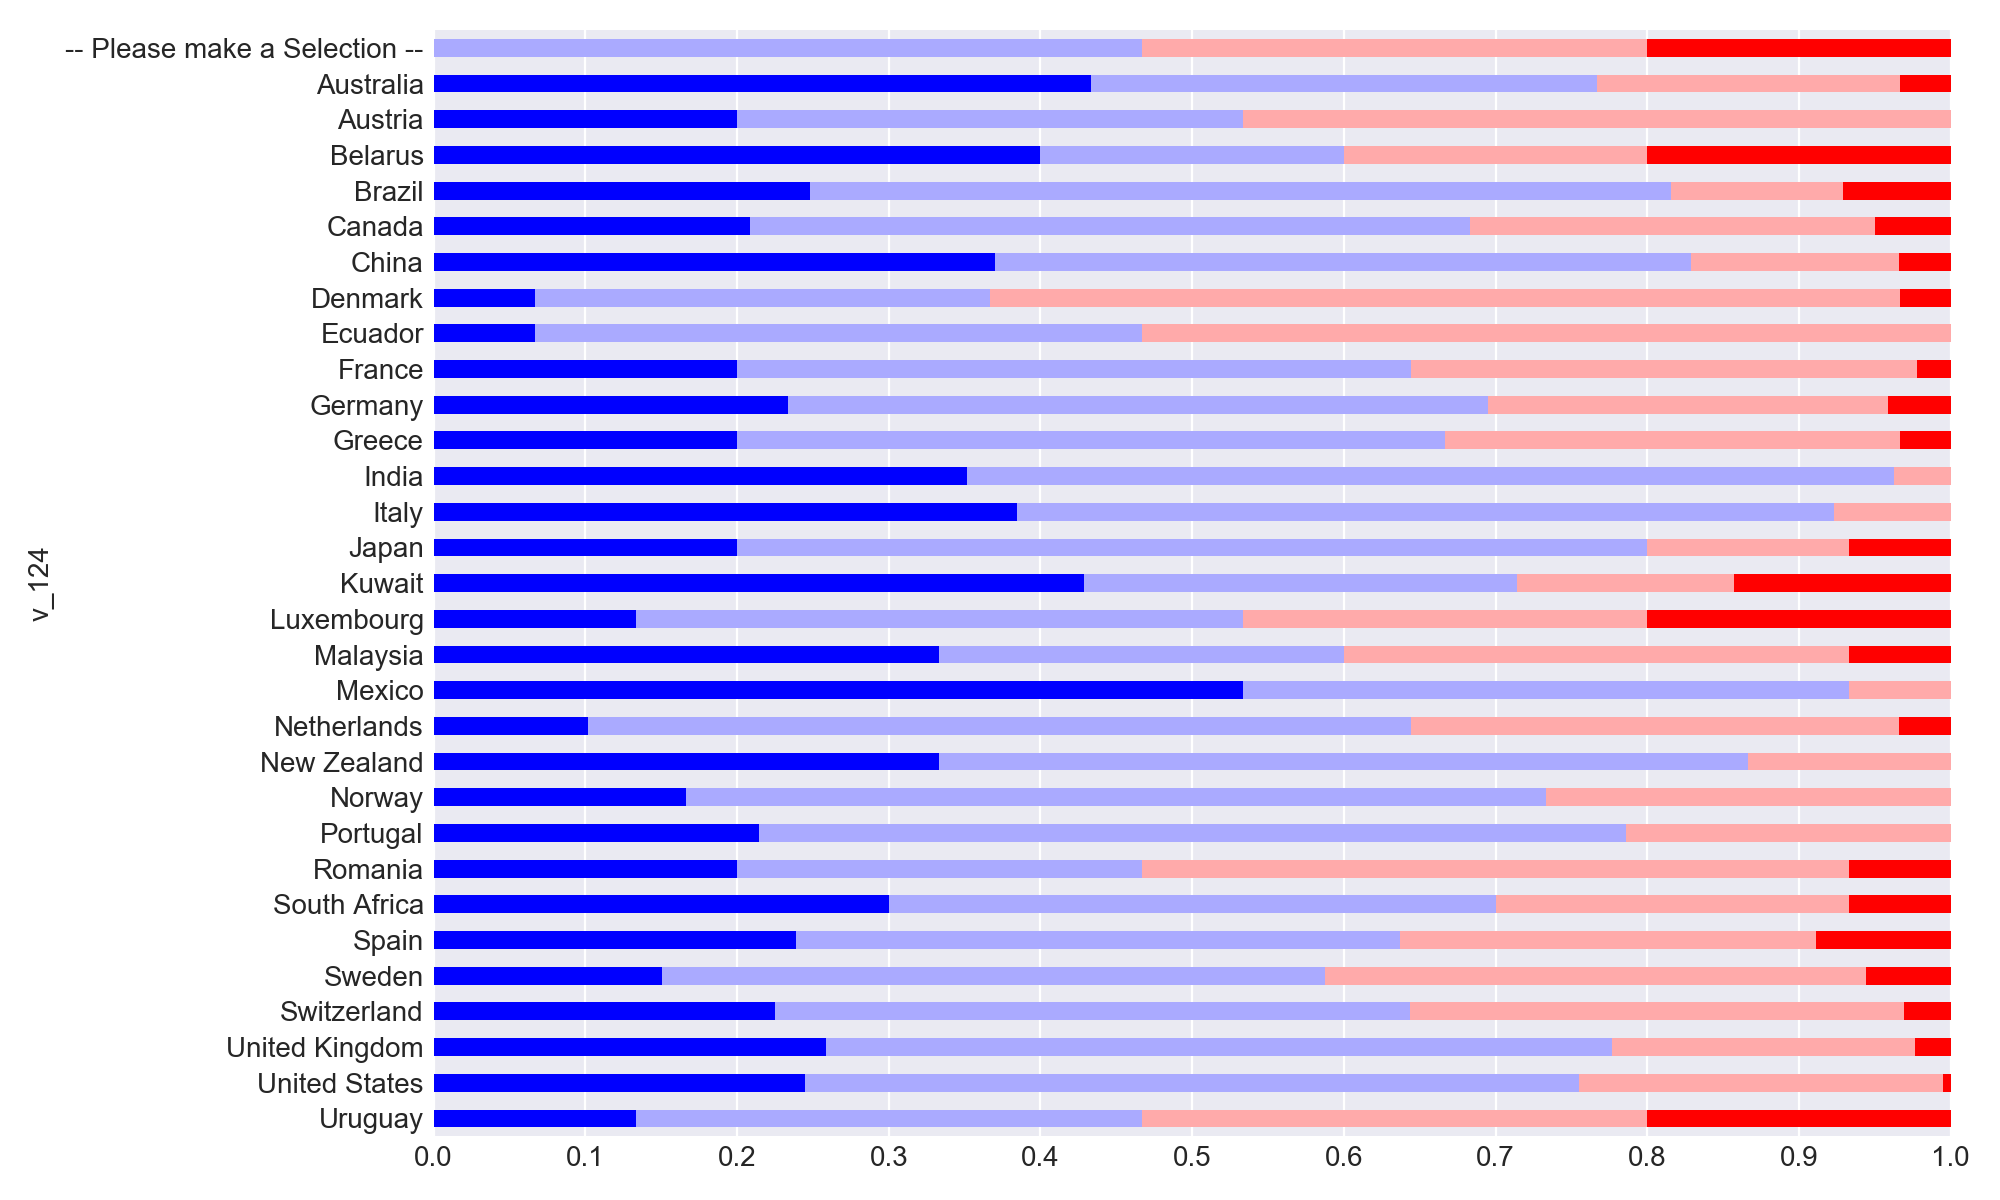

In [246]:
(bycountry.T / bycountry.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(10,6))
plt.legend([])
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.tight_layout();

### By Role (v_5)

NB: At this point, without coded answers from v_6

In [222]:
byrole = df.groupby(['v_5', 'Vote']
            ).count().reset_index().rename({'index':'v_5'}
                                          ).pivot('v_5', 'Vote', 'EvID'
            ).sort_index(ascending=False).fillna(0)

<IPython.core.display.Javascript object>


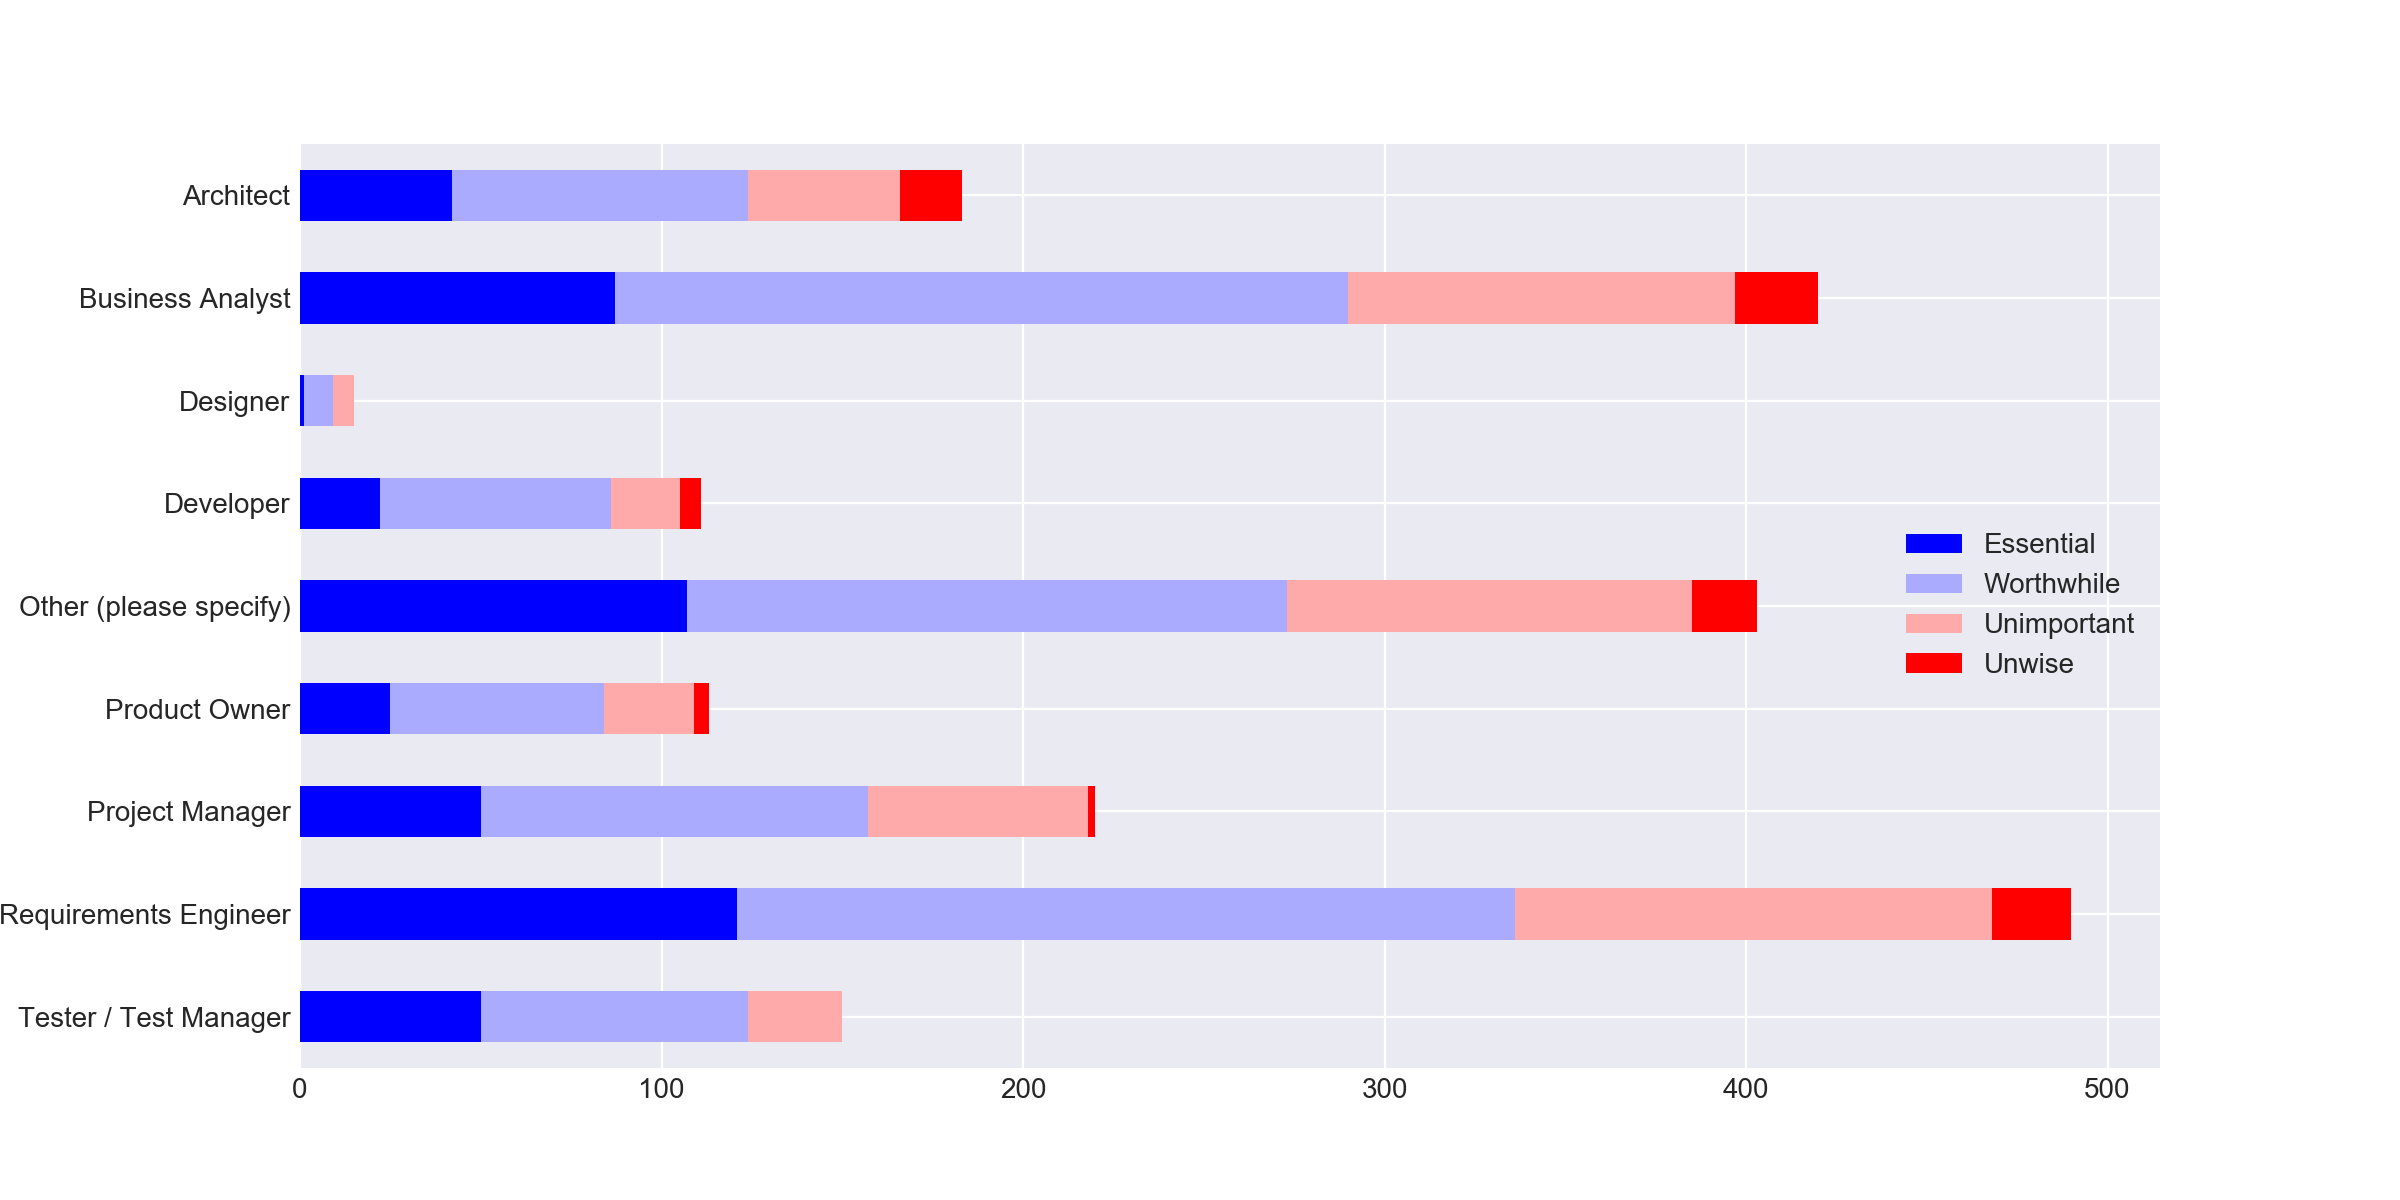

In [223]:
byrole.plot.barh(
    stacked=True, cmap='bwr', figsize=(12,6))
plt.legend(loc='center right');

<IPython.core.display.Javascript object>


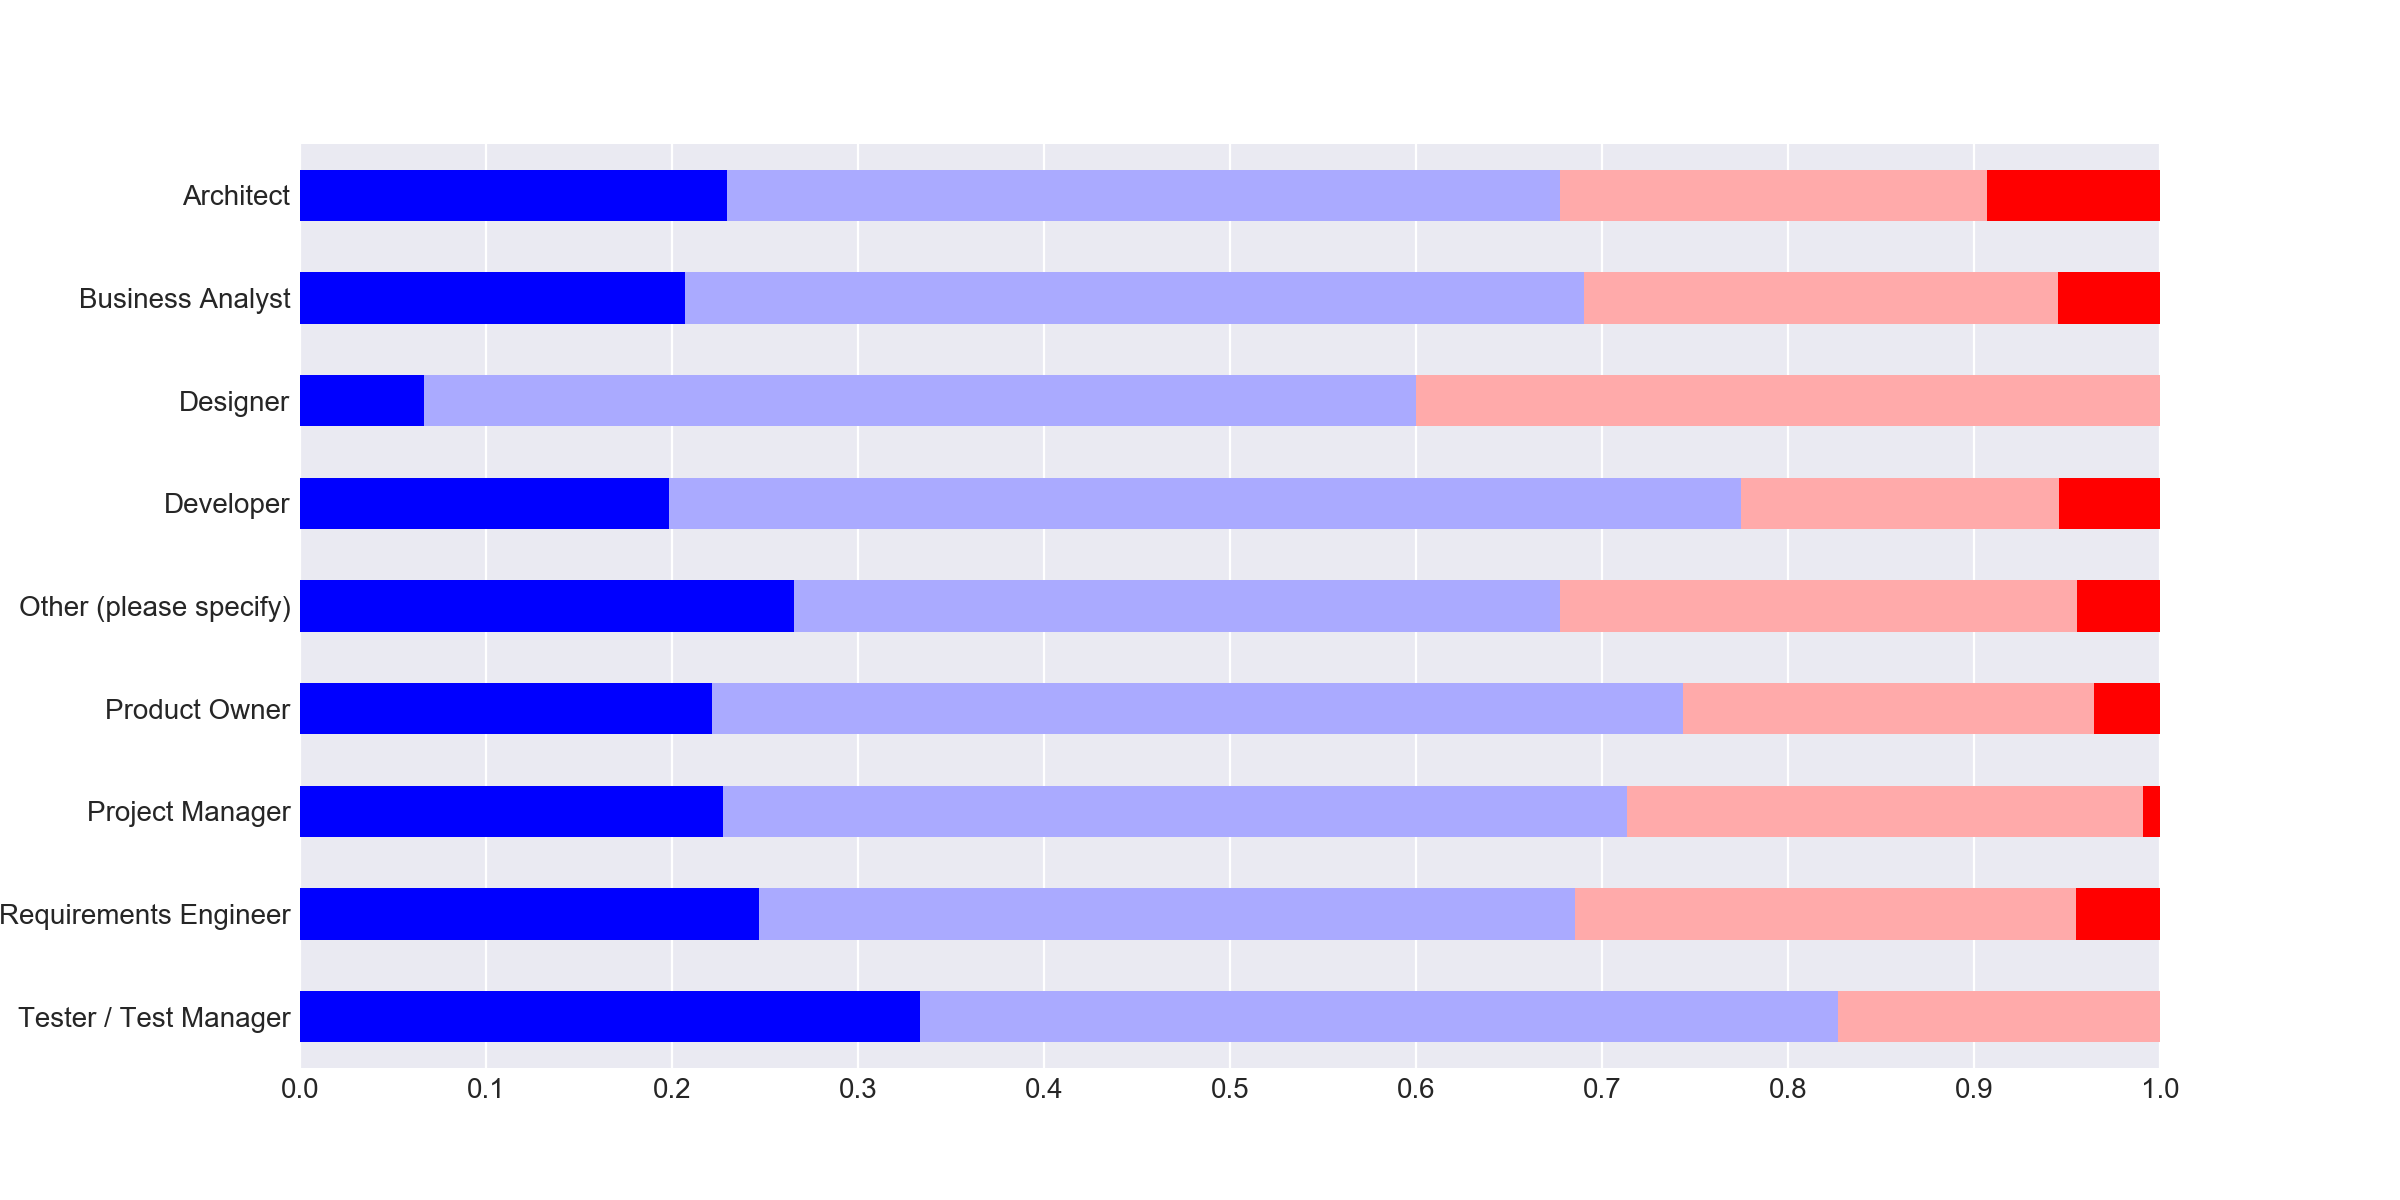

In [287]:
(byrole.T / byrole.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(12,6))
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.legend([]);

### By CS Degree (v_12)

In [209]:
csdegree = df.groupby(['v_12', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_12', 'Vote', 'EvID')
csdegree

Vote,Essential,Worthwhile,Unimportant,Unwise
v_12,,,,
No,116,232,152,16
Yes,389,746,378,76


<IPython.core.display.Javascript object>


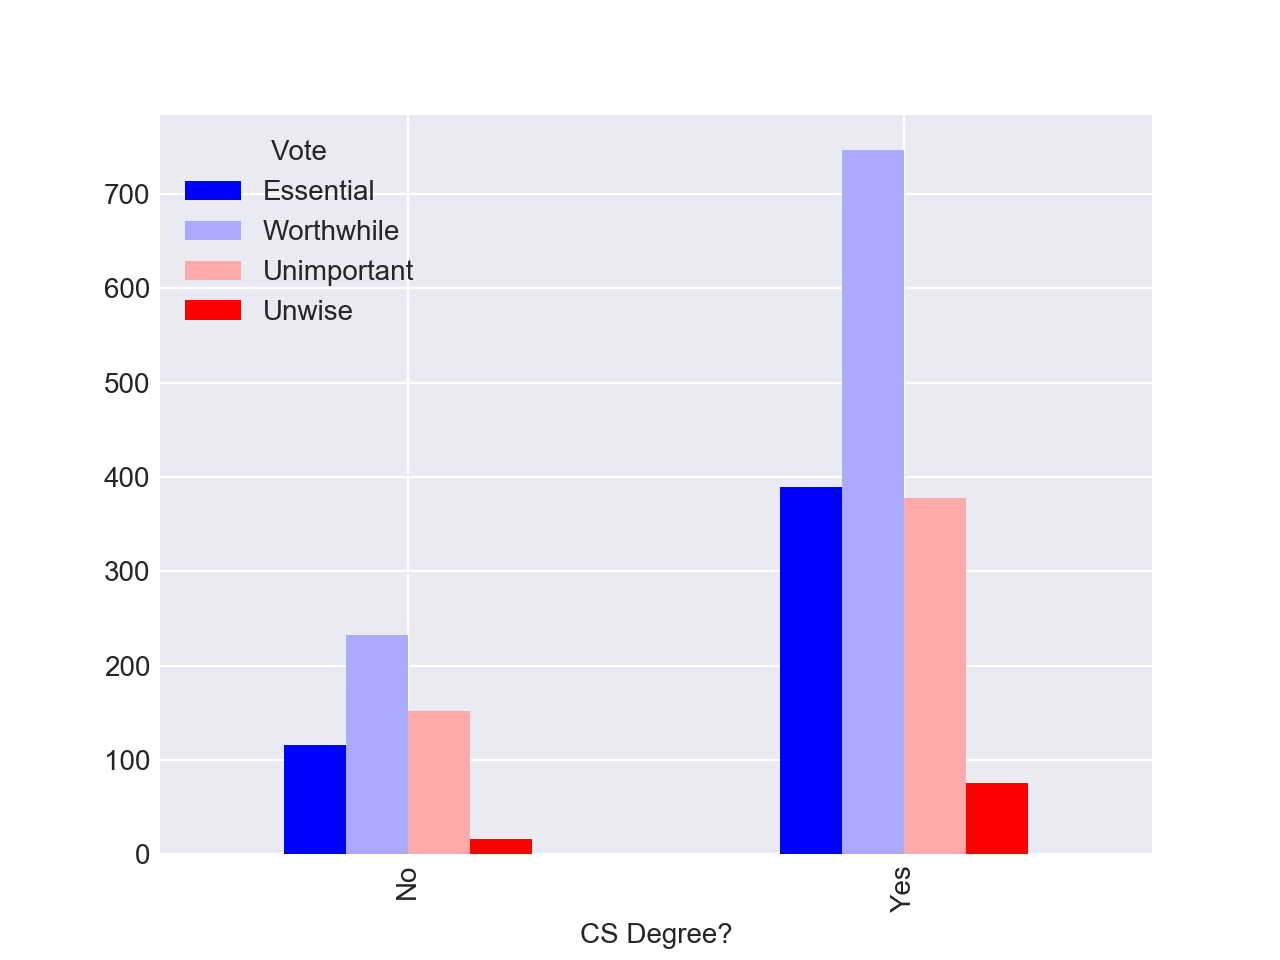

In [208]:
csdegree.plot.bar(cmap='bwr')
plt.xlabel('CS Degree?');

<IPython.core.display.Javascript object>


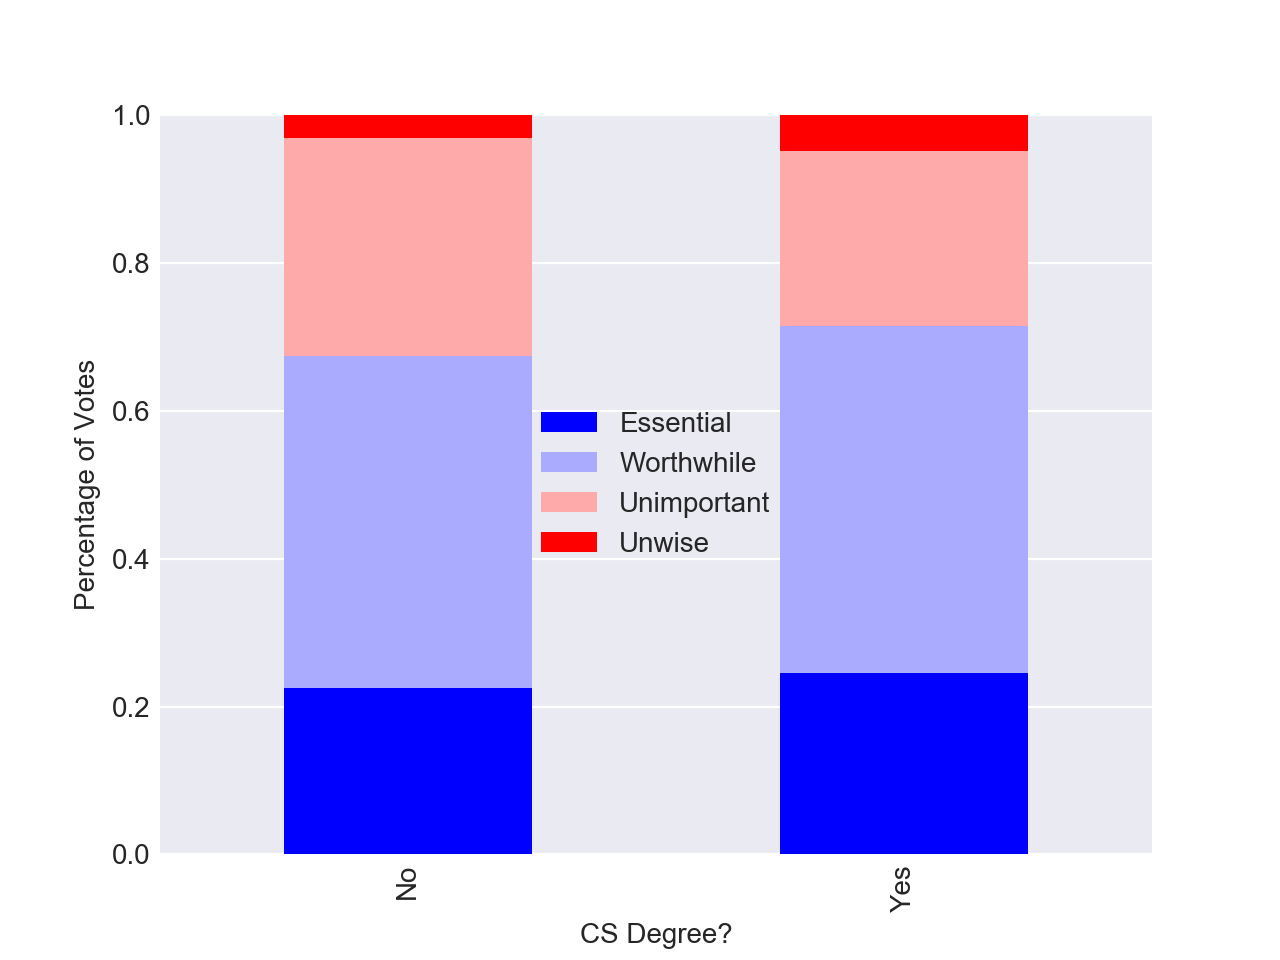

In [221]:
(csdegree.T / csdegree.T.sum()).T.plot.bar(stacked=True, cmap='bwr')
plt.ylim(0,1)
plt.xlabel('CS Degree?')
plt.ylabel('Percentage of Votes')
plt.legend(loc='center')

### By Team Size (v_14)

In [252]:
teamsize = df.groupby(['v_14', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_14', 'Vote', 'EvID')
teamsize

Vote,Essential,Worthwhile,Unimportant,Unwise
v_14,,,,
Small (1-4),88,148,77,20
Medium (5-10),211,433,261,39
Larger (10-49),153,316,141,22
Very large (50+),53,81,51,11


<IPython.core.display.Javascript object>


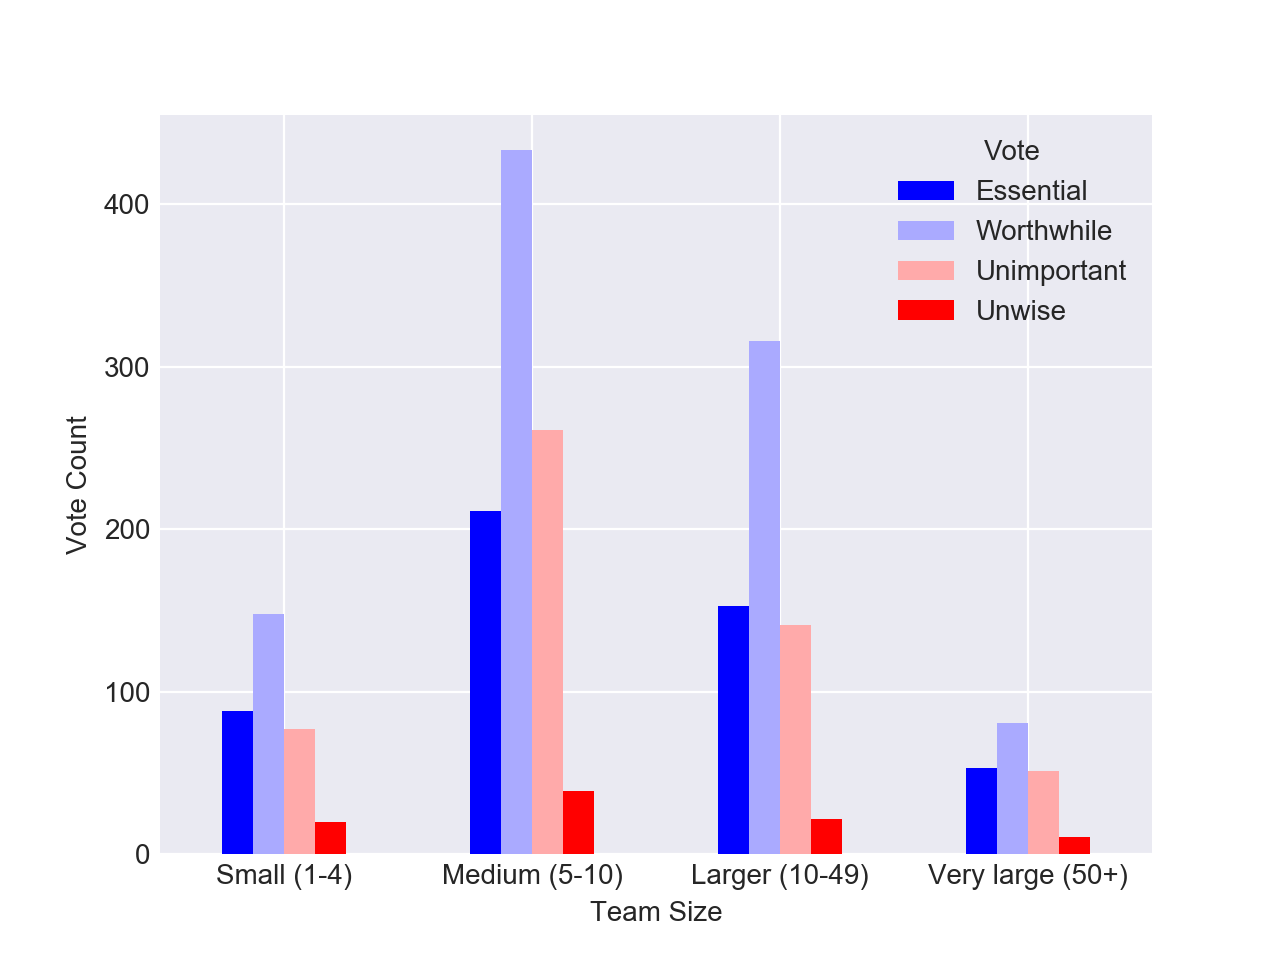

In [253]:
teamsize.plot.bar(rot=0,cmap='bwr')
plt.xlabel('Team Size')
plt.ylabel('Vote Count');

In [254]:
(teamsize.T / teamsize.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_14,,,,
Small (1-4),0.264264,0.444444,0.231231,0.060060
Medium (5-10),0.223517,0.458686,0.276483,0.041314
Larger (10-49),0.242089,0.500000,0.223101,0.034810
Very large (50+),0.270408,0.413265,0.260204,0.056122


<IPython.core.display.Javascript object>


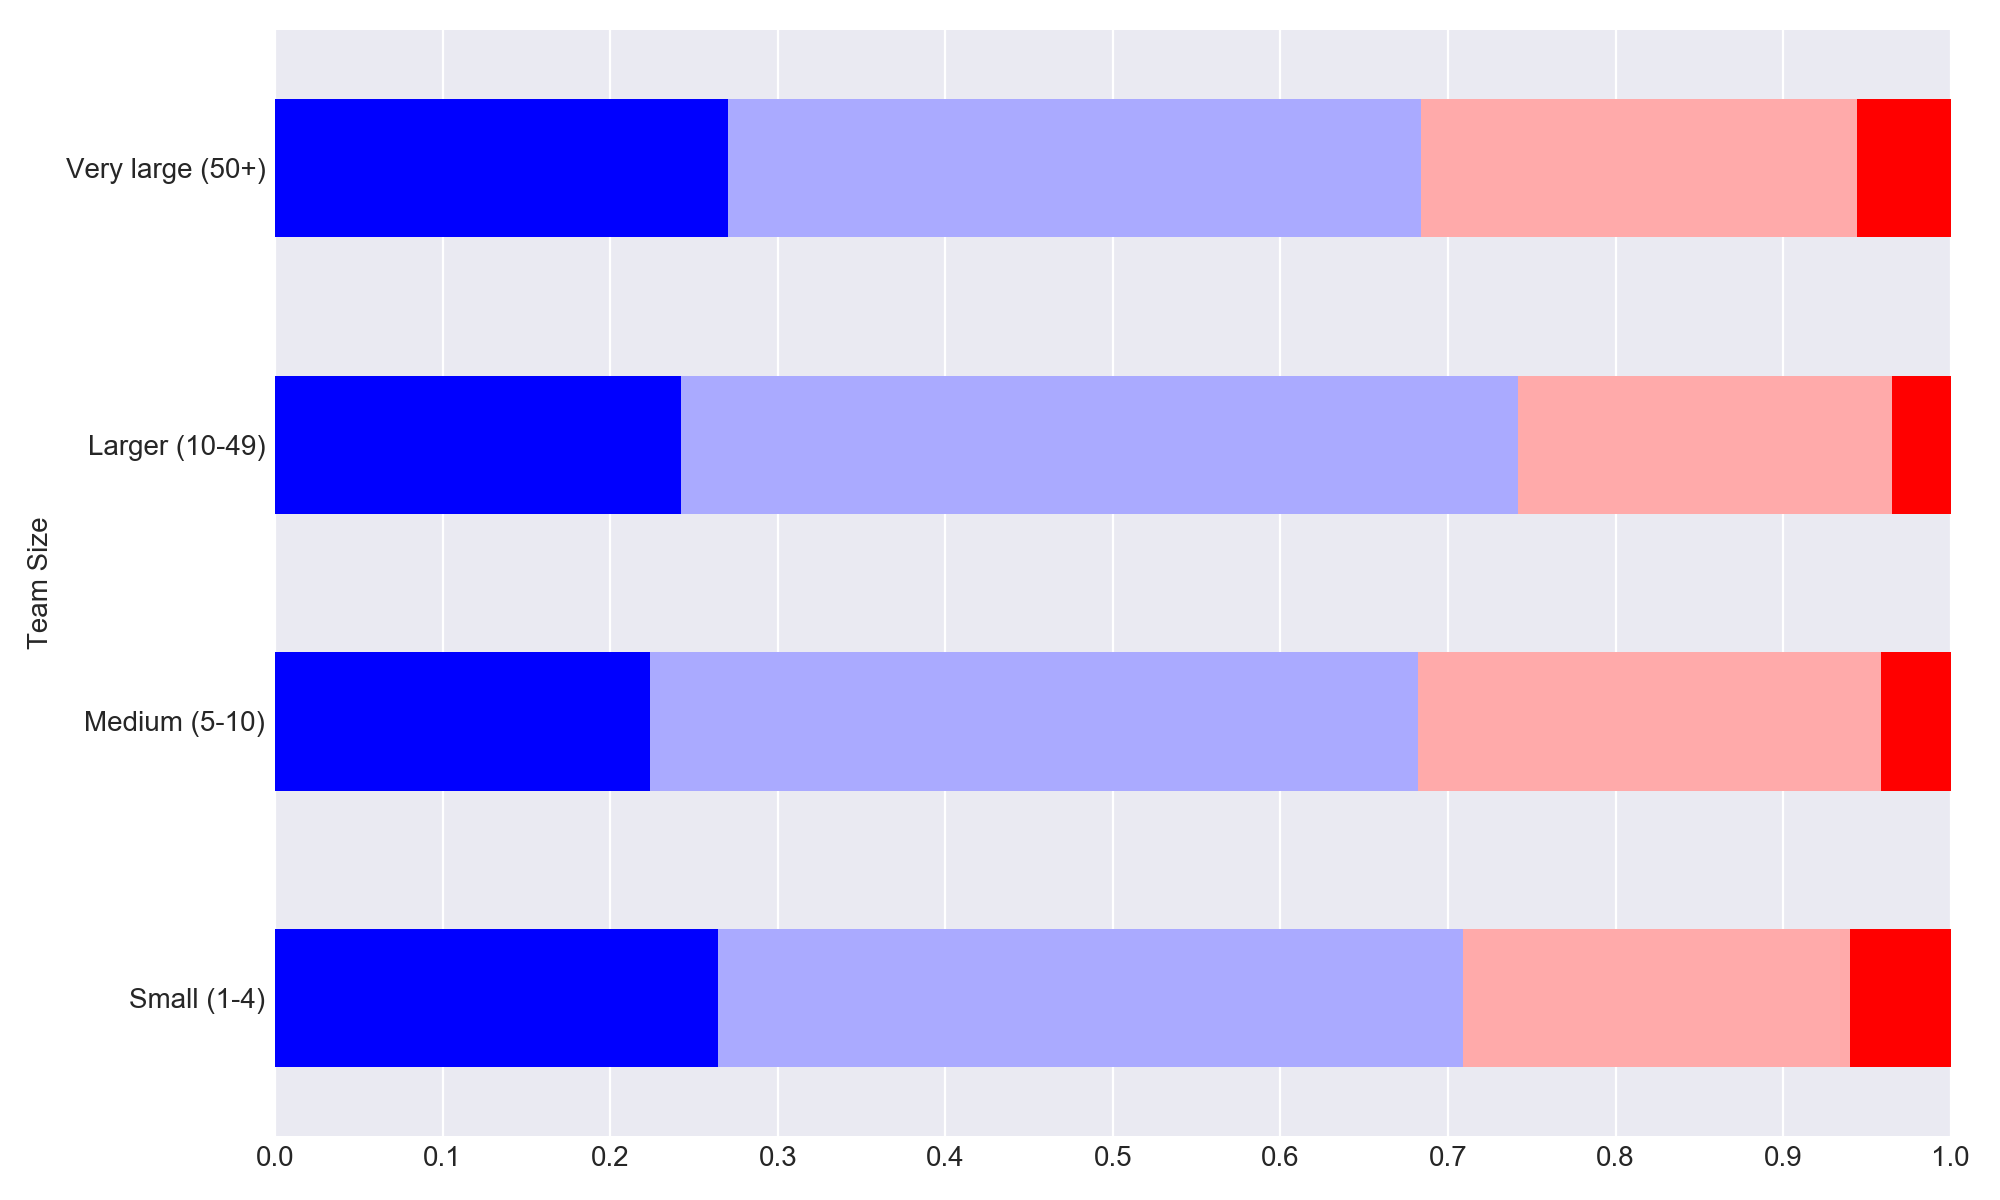

In [260]:
(teamsize.T / teamsize.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(10,6))
plt.legend([])
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.ylabel('Team Size')
plt.tight_layout();

### By Class of Systems (v_15)

NB: At this point, without coded answers from v_16

In [262]:
systems = df.groupby(['v_15', 'Vote']).count()[['EvID']].reset_index(
).pivot('v_15', 'Vote', 'EvID')
systems

Vote,Essential,Worthwhile,Unimportant,Unwise
v_15,,,,
(Business) information systems,247,466,245,49
Hybrid / mix of embedded systems and information systems,110,224,134,24
Other (please specify),33,63,56,7
Software-intensive embedded systems,115,225,95,12


<IPython.core.display.Javascript object>


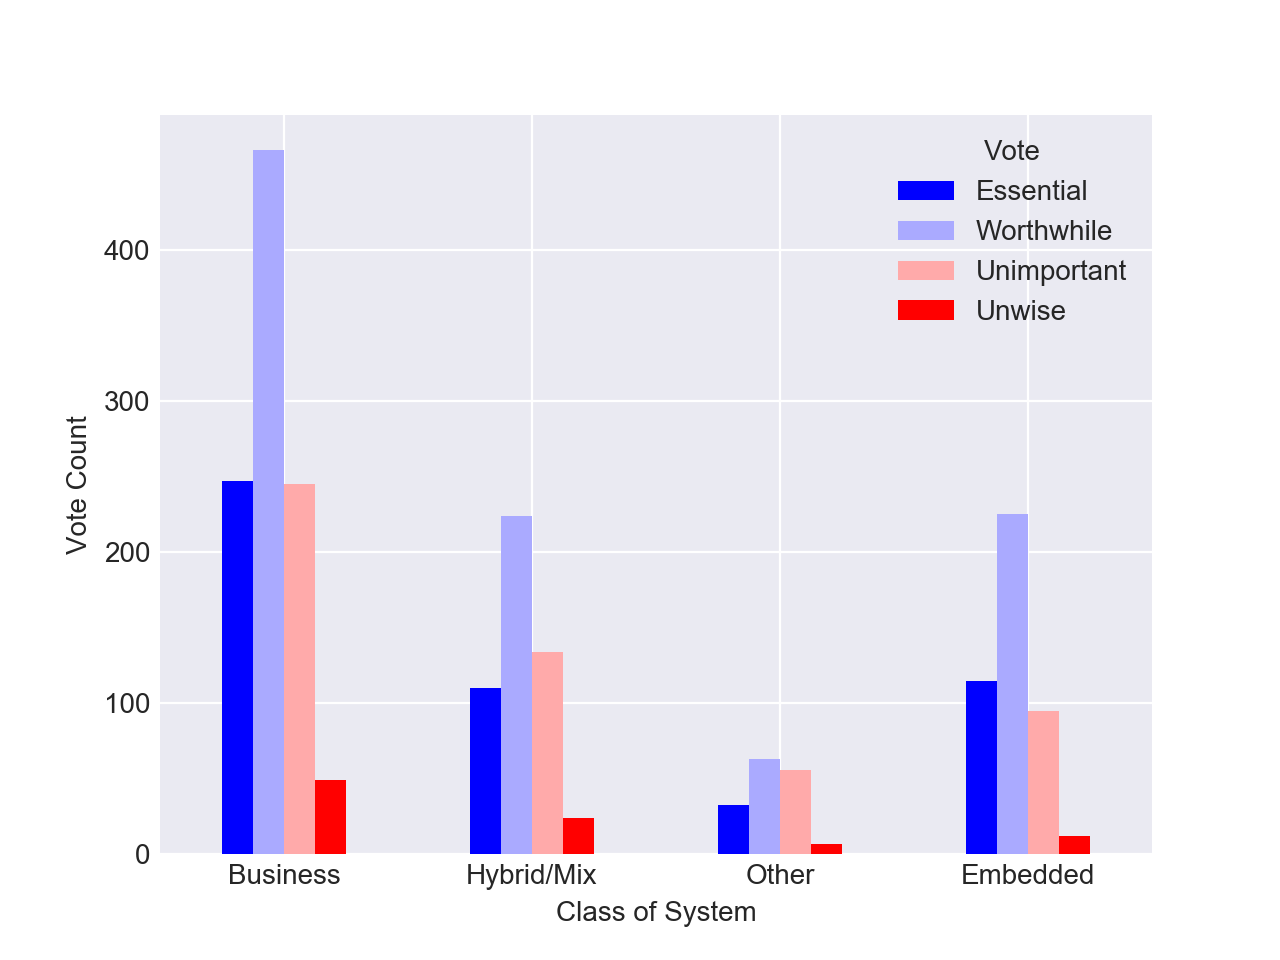

In [263]:
systems.plot.bar(cmap='bwr', rot=0)
plt.xlabel('Class of System')
plt.ylabel('Vote Count');
plt.xticks(np.arange(4), 
           ['Business', 'Hybrid/Mix', 'Other', 'Embedded']);

In [264]:
(systems.T / systems.T.sum()).T

Vote,Essential,Worthwhile,Unimportant,Unwise
v_15,,,,
(Business) information systems,0.245283,0.462761,0.243297,0.048659
Hybrid / mix of embedded systems and information systems,0.223577,0.455285,0.272358,0.048780
Other (please specify),0.207547,0.396226,0.352201,0.044025
Software-intensive embedded systems,0.257271,0.503356,0.212528,0.026846


<IPython.core.display.Javascript object>


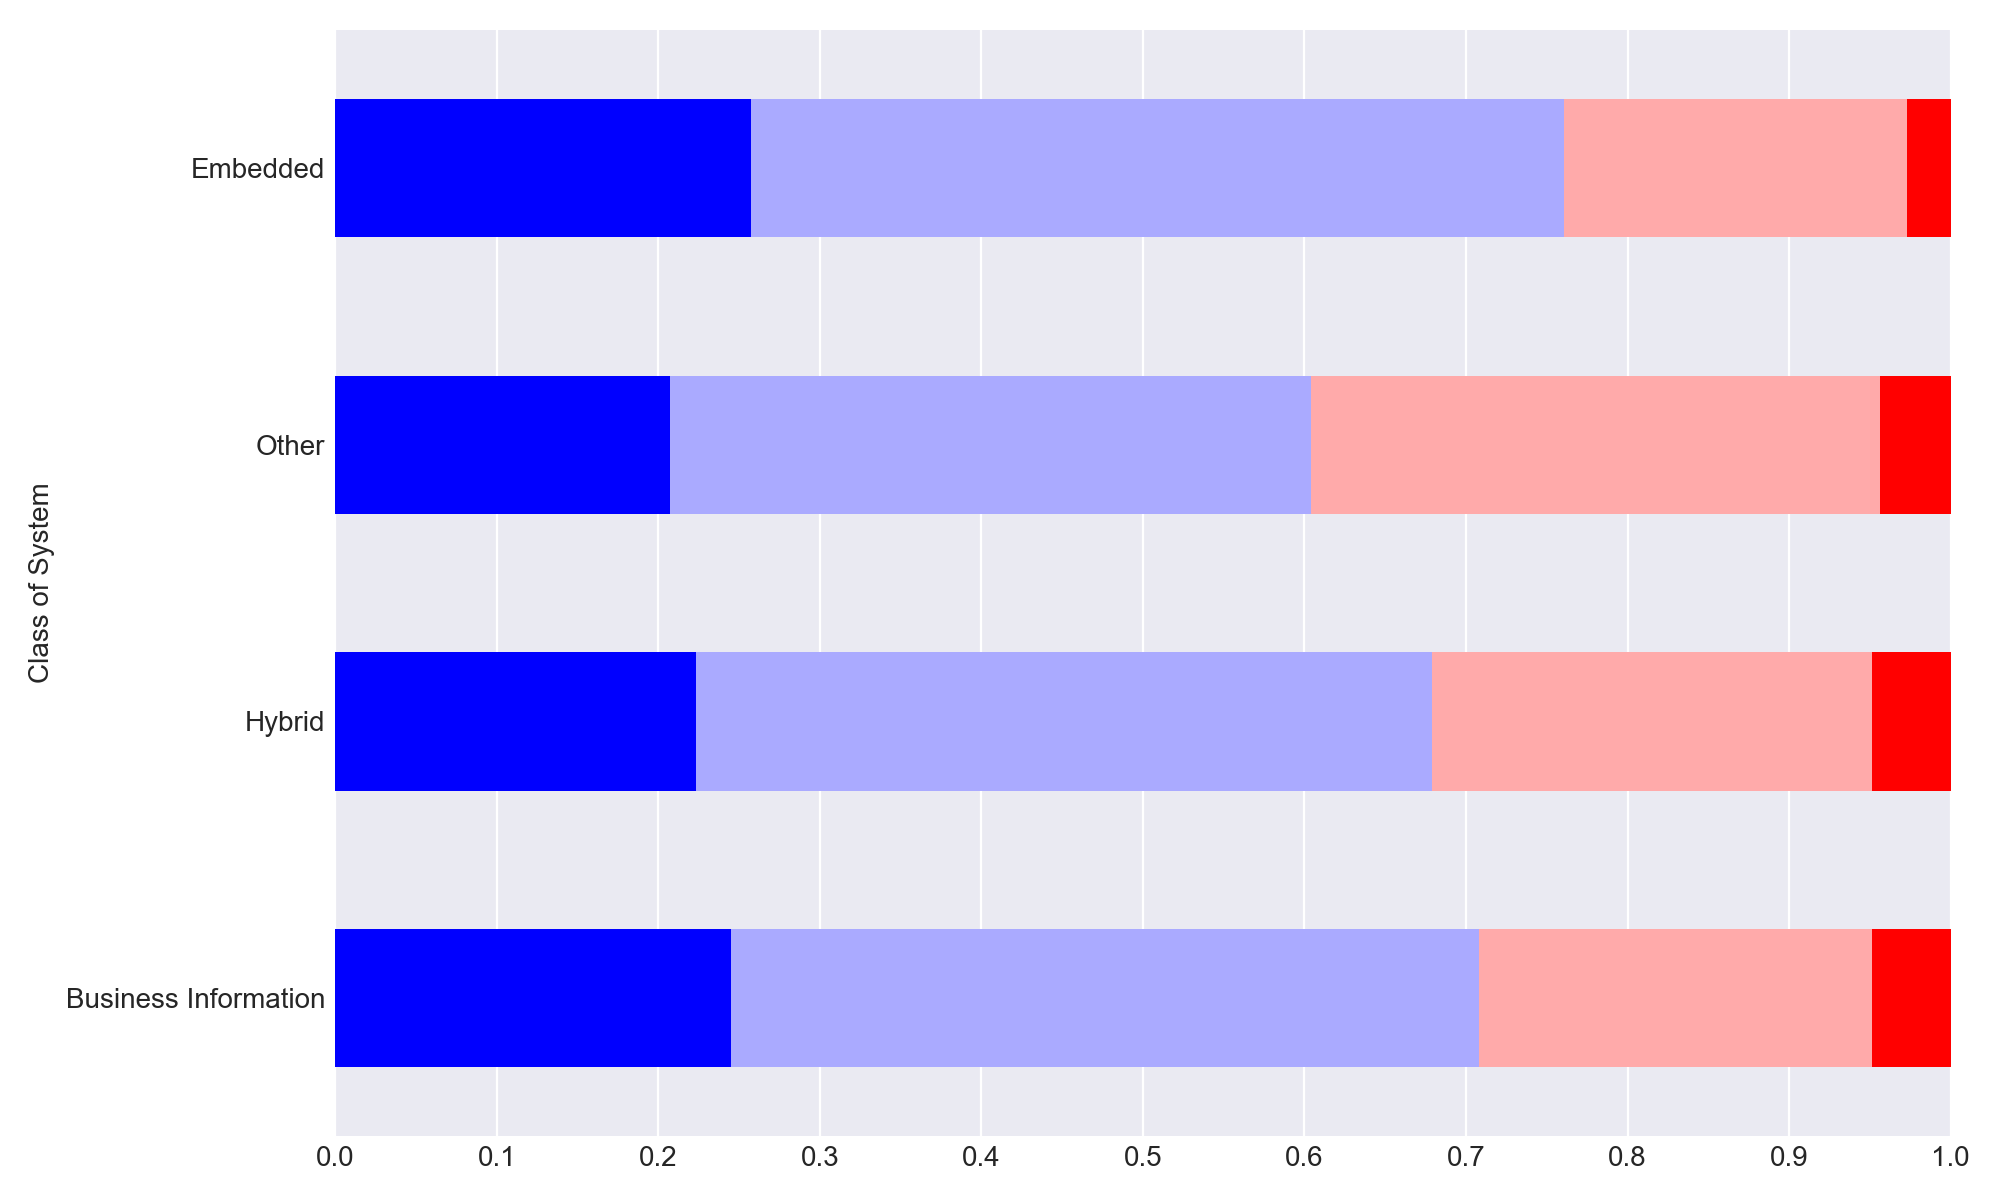

In [286]:
(systems.T / systems.T.sum()).T.plot.barh(stacked=True, cmap='bwr', figsize=(10,6))
plt.xlim(0,1)
plt.yticks(np.arange(4), ['Business Information', 'Hybrid', 'Other', 'Embedded', ])
plt.ylabel('Class of System')
plt.legend([])
plt.xticks(np.arange(0,1.1,0.1))
plt.tight_layout();

### Degree of Involvement in RE

NB: I have no idea why this was not implemented as a single-selection question. 
The way participants answered, it is impossible to cleanly define what they answered. 
Some might have understood the question so as to tick only their 'maximum' involvement, seeing the first three levels in a 'nested/subset' relationship (especially due to the word 'extent' in the question).
Others might have ticked just one, not seeing the subset relationship.
Others might have ticked all degrees of involvement that apply.

In [112]:
reqvars = ['v_'+str(x) for x in range(118,122)]

Let's see whether the answers are at least internally consistent by looking at v_118-v_121 in their bitvector representations.

In [175]:
involvement = df[reqvars].replace(['quoted', 'not quoted'], [1,0]).stack()

In [176]:
involvement.head()

0  v_118    1
   v_119    1
   v_120    1
   v_121    0
1  v_118    1
dtype: int64

In [177]:
answers = [tuple(involvement[x].values) for x in involvement.index.levels[0]]

In [178]:
set(answers)

{(0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 1, 0),
 (1, 0, 0, 0),
 (1, 0, 1, 0),
 (1, 1, 0, 0),
 (1, 1, 1, 0)}

Of the different answer vectors, (0,0,1,1), (1,0,1,0), (1,1,0,0) seem problematic, as seem either (1,0,0,0), (0,1,0,0), (0,0,1,0) or (1,1,1,0), (0,1,1,0), (1,1,0,0), depending on the viewpoint. It will be hard to derive anything meaningful from this...

In [181]:
reqvectors = pd.DataFrame(df[['EvID', 'Vote']], copy=True)
reqvectors['InvolvementVector'] = answers
reqvectors.head()

,EvID,Vote,InvolvementVector
0,2,Worthwhile,"(1, 1, 1, 0)"
1,2,Unwise,"(1, 1, 1, 0)"
2,2,Essential,"(1, 1, 1, 0)"
3,2,Unimportant,"(1, 1, 1, 0)"
4,2,Unwise,"(1, 1, 1, 0)"


In [300]:
rvdf = reqvectors.groupby(['InvolvementVector', 'Vote']).count().fillna(0).reset_index(
).pivot('InvolvementVector', 'Vote', 'EvID')
rvdf

Vote,Essential,Worthwhile,Unimportant,Unwise
InvolvementVector,,,,
"(0, 0, 0, 1)",0.0,3.0,8.0,4.0
"(0, 0, 1, 0)",42.0,54.0,20.0,2.0
"(0, 0, 1, 1)",1.0,11.0,1.0,2.0
"(0, 1, 0, 0)",84.0,152.0,67.0,16.0
"(0, 1, 1, 0)",58.0,114.0,50.0,9.0
"(1, 0, 0, 0)",160.0,329.0,199.0,30.0
"(1, 0, 1, 0)",30.0,40.0,30.0,2.0
"(1, 1, 0, 0)",64.0,125.0,56.0,13.0
"(1, 1, 1, 0)",66.0,150.0,99.0,14.0


<IPython.core.display.Javascript object>


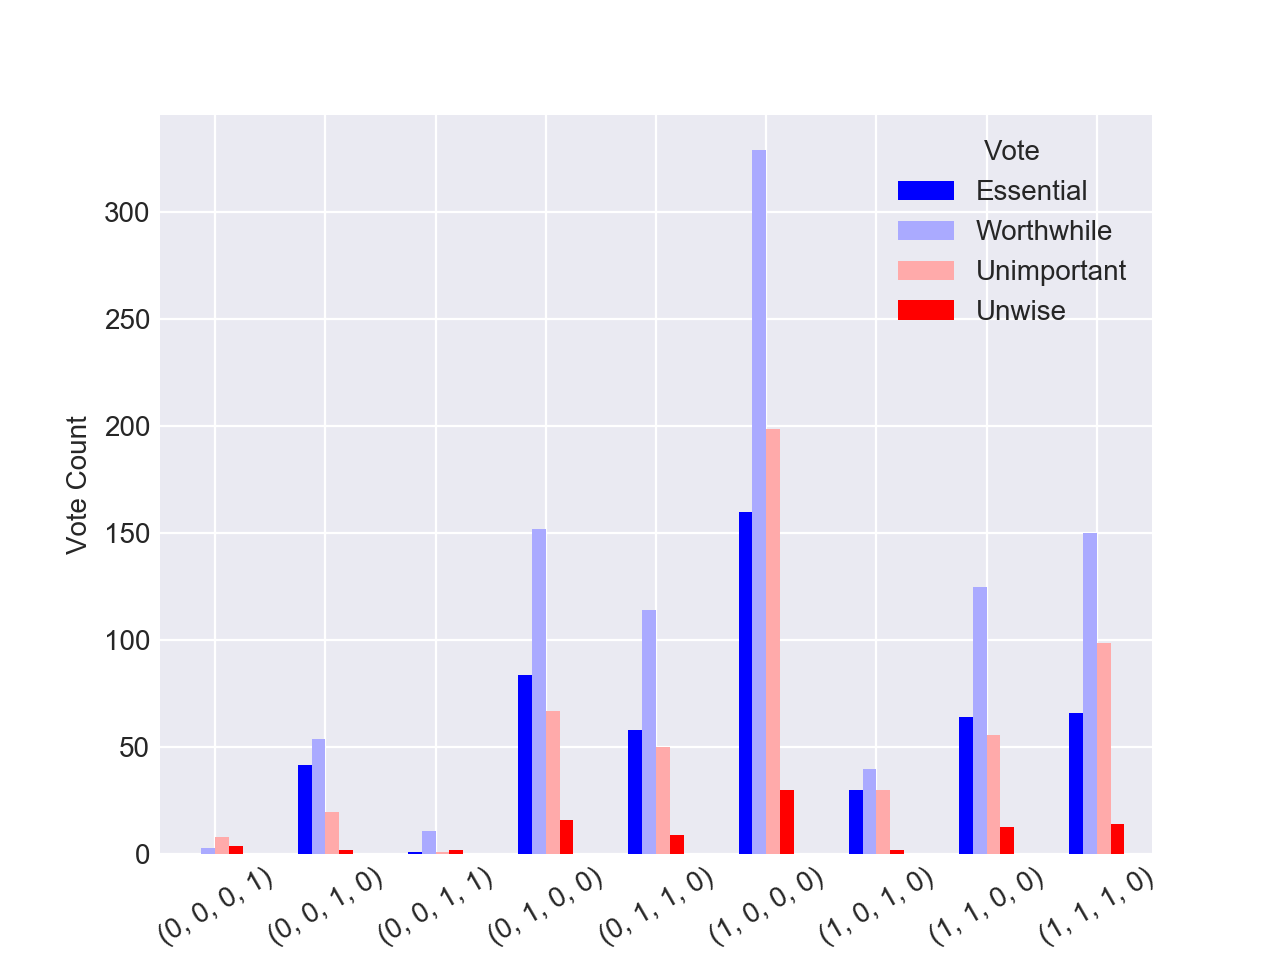

In [291]:
rvdf.plot.bar(cmap='bwr', rot=30)
plt.ylabel('Vote Count');

<IPython.core.display.Javascript object>


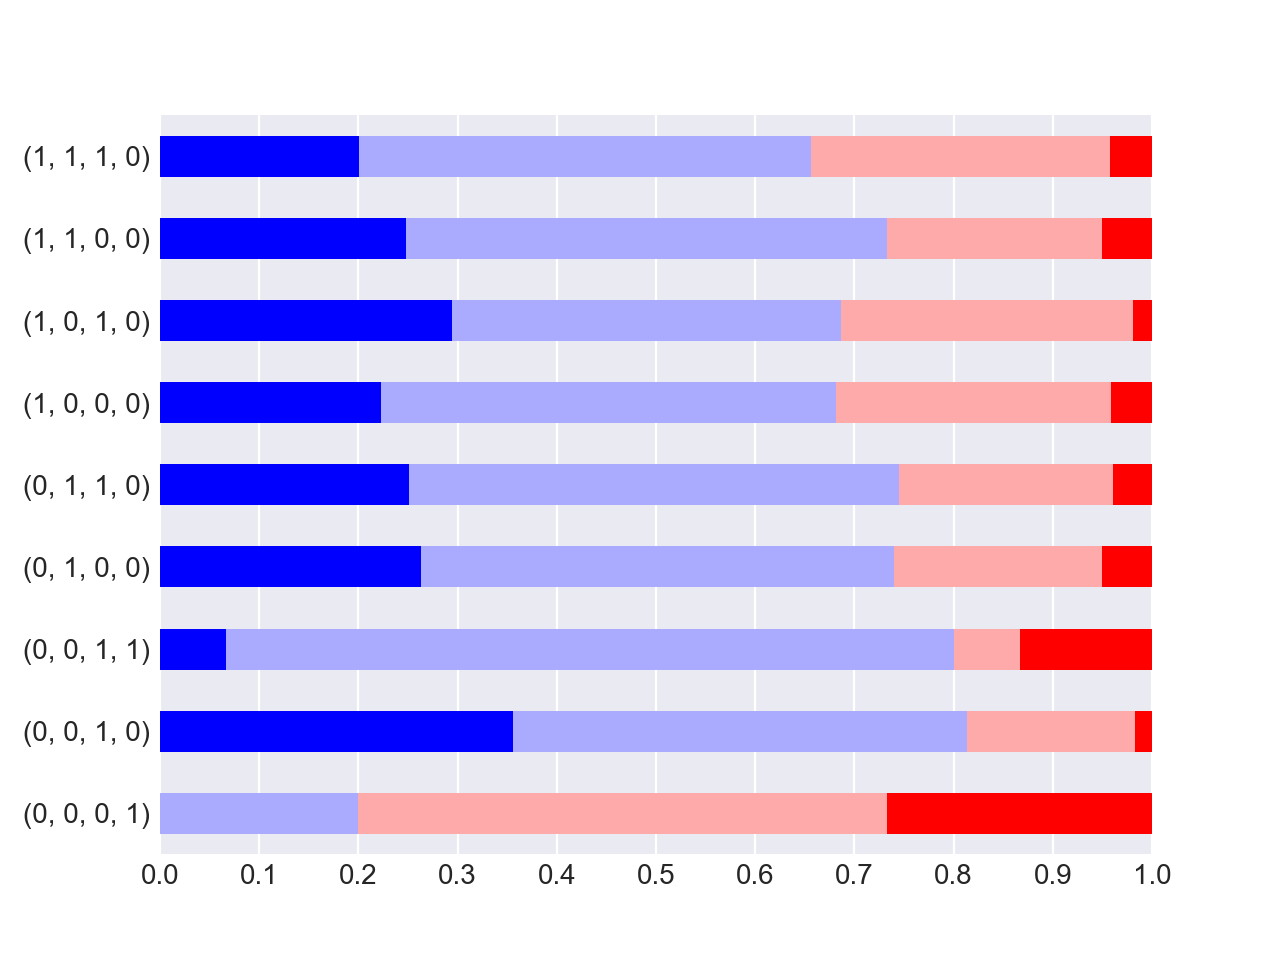

In [299]:
(rvdf.T / rvdf.T.sum()).T.plot.barh(stacked=True, cmap='bwr', rot=0)
plt.xlim(0,1)
plt.xticks(np.arange(0,1.1,0.1))
plt.ylabel('')
plt.legend([]);

In my opinion, it would be unwise to look just at the maximum involvement (e.g., pooling (1,0,0,0), (1,0,1,0), (1,0,1,0) and (1,1,1,0), as participants might well have understood the question differently...

The End.